In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

612


## Perform API Calls

In [3]:
# Do an example json call just to see what the json data looks like 

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city = "geraldton"
city_url = base_url + "&q=" + city
city_data = requests.get(city_url).json()
print(city_data)

{'coord': {'lon': -86.95, 'lat': 49.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1022, 'humidity': 44, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 24140, 'wind': {'speed': 14.99, 'deg': 310, 'gust': 11.3}, 'clouds': {'all': 75}, 'dt': 1538679600, 'sys': {'type': 1, 'id': 3656, 'message': 0.0035, 'country': 'CA', 'sunrise': 1538654014, 'sunset': 1538695079}, 'id': 5960603, 'name': 'Geraldton', 'cod': 200}


In [4]:
#Compile data for a bunch of random cities

#print START
print("Beginning Data Retrieval")
print("----------------------------------")

#create empty lists to store data for later
final_city_list = []
lat_list = []
lng_list = []
temp_list = []
cloud_list = []
humid_list = []
wind_list = []

# create a base URL to be used later 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


#set up for loop to get all the data we need for each city
#I also set up a checkpoint to check if city actually appears in OpenWeatherMap; 
#the cities not in OpenWeatherMap return a 404 error

count = 0

for city in cities:
    city_url = base_url + "&q=" + city + "&units=imperial"
    city_json = requests.get(city_url).json()
    if (city_json["cod"] == "404"):
        continue
    else: 
        count = count + 1
        print (f"Record {count} = {city}")
        final_city_list.append(city)
        
        lat = city_json["coord"]["lat"]
        lat_list.append(lat)
        
        lng = city_json["coord"]["lon"]
        lng_list.append(lng)
        
        temp = city_json["main"]["temp"] 
        temp_list.append(temp)
        
        cloud = city_json["clouds"]["all"]
        cloud_list.append(cloud)
        
        humid = city_json["main"]["humidity"]
        humid_list.append(humid)
        
        wind = city_json["wind"]["speed"]
        wind_list.append(wind)
        
#print END
print("----------------------------------")
print("Data Retrieval Complete!")
print("----------------------------------")


Beginning Data Retrieval
----------------------------------
Record 1 = ilulissat
Record 2 = albany
Record 3 = hilo
Record 4 = cape town
Record 5 = te anau
Record 6 = cayenne
Record 7 = dikson
Record 8 = rikitea
Record 9 = mar del plata
Record 10 = kapaa
Record 11 = thompson
Record 12 = port hawkesbury
Record 13 = hobart
Record 14 = north myrtle beach
Record 15 = khatanga
Record 16 = preston
Record 17 = roma
Record 18 = yerbogachen
Record 19 = atuona
Record 20 = castro
Record 21 = arraial do cabo
Record 22 = hamilton
Record 23 = mataura
Record 24 = san patricio
Record 25 = tuktoyaktuk
Record 26 = sechura
Record 27 = saint-joseph
Record 28 = nouadhibou
Record 29 = qaanaaq
Record 30 = punta arenas
Record 31 = wanning
Record 32 = kendari
Record 33 = katsuura
Record 34 = teguise
Record 35 = avarua
Record 36 = oranjemund
Record 37 = kodiak
Record 38 = saint-philippe
Record 39 = fremont
Record 40 = ushuaia
Record 41 = hithadhoo
Record 42 = thai nguyen
Record 43 = rio grande
Record 44 = kangaa

Record 372 = seymchan
Record 373 = hofn
Record 374 = mantua
Record 375 = maningrida
Record 376 = carballo
Record 377 = covington
Record 378 = ugoofaaru
Record 379 = tamandare
Record 380 = zhezkazgan
Record 381 = souillac
Record 382 = itoman
Record 383 = yulara
Record 384 = pasni
Record 385 = salalah
Record 386 = gushikawa
Record 387 = sabha
Record 388 = cefalu
Record 389 = fairmont
Record 390 = aleksandrov gay
Record 391 = silopi
Record 392 = pontianak
Record 393 = galesong
Record 394 = makakilo city
Record 395 = wamba
Record 396 = nome
Record 397 = tuy hoa
Record 398 = pacific grove
Record 399 = coron
Record 400 = svetlaya
Record 401 = riyadh
Record 402 = severnoye
Record 403 = kourou
Record 404 = veraval
Record 405 = fukue
Record 406 = bay roberts
Record 407 = abu kamal
Record 408 = kyren
Record 409 = ustyuzhna
Record 410 = kysyl-syr
Record 411 = manzil salim
Record 412 = lata
Record 413 = sistranda
Record 414 = mount gambier
Record 415 = vila velha
Record 416 = dudinka
Record 417 = 

In [5]:
len(final_city_list)

540

In [6]:
all_data = {"City": final_city_list,
            "Latitude" : lat_list, 
            "Longitude": lng_list, 
           "Temperature" : temp_list,
           "Humidity" : humid_list,
           "Cloudiness" : cloud_list,
           "Wind Speed" : wind_list}

all_data_df = pd.DataFrame(all_data)

#include only 500 cities
five00_df = all_data_df.iloc[0:500]
five00_df


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,ilulissat,69.22,-51.10,30.20,68,75,12.75
1,albany,42.65,-73.75,70.97,73,90,13.87
2,hilo,19.71,-155.08,68.59,93,90,4.70
3,cape town,-33.93,18.42,62.60,77,0,8.05
4,te anau,-45.41,167.72,36.33,100,64,0.60
5,cayenne,4.94,-52.33,87.80,62,0,13.87
6,dikson,73.51,80.55,38.94,98,88,21.07
7,rikitea,-23.12,-134.97,68.73,100,76,13.35
8,mar del plata,-46.43,-67.52,59.01,46,0,3.74
9,kapaa,22.08,-159.32,80.06,71,40,8.05


In [7]:
#check if all 500 cities are unique (no repeats)
len(five00_df["City"].unique())

500

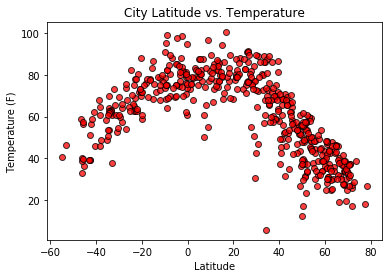

In [8]:
#Build a scatterplot that shows Temperature vs. Latitude
#x = latitude
#y = Temperature

x_lat = five00_df["Latitude"]
y_temp = five00_df["Temperature"]

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(x_lat, y_temp, marker="o", facecolors="red", edgecolors="black",alpha=0.75)

# Save Figure
plt.savefig("Temp_vs_Lat")

# Print Figure
plt.show()

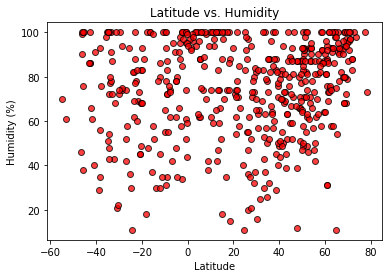

In [9]:
#Build a scatterplot that shows Humidity (%) vs. Latitude
#x = latitude
#y = Humidity

x_lat = five00_df["Latitude"]
y_humid = five00_df["Humidity"]

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_lat, y_humid, marker="o", facecolors="red", edgecolors="black",alpha=0.75)

# Save Figure
plt.savefig("Humidity_vs_Lat")

# Print Figure
plt.show()

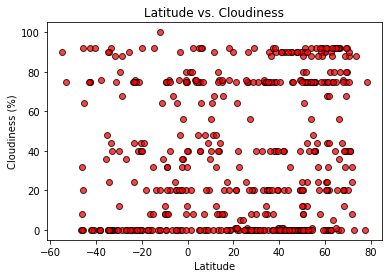

In [10]:
#Build a scatterplot that shows Cloudiness (%) vs. Latitude
#x = latitude
#y = Cloudiness

x_lat = five00_df["Latitude"]
y_cloud = five00_df["Cloudiness"]

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_lat, y_cloud, marker="o", facecolors="red", edgecolors="black",alpha=0.75)

# Save Figure
plt.savefig("Cloudiness_vs_Lat")

# Print Figure
plt.show()

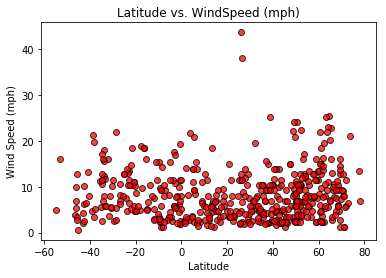

In [11]:
#Build a scatterplot that shows Wind Speed (mph) vs. Latitude
#x = latitude
#y = Wind Speed

x_lat = five00_df["Latitude"]
y_wind = five00_df["Wind Speed"]

plt.title("Latitude vs. WindSpeed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_lat, y_wind, marker="o", facecolors="red", edgecolors="black",alpha=0.75)

# Save Figure
plt.savefig("Windspeed_vs_Lat")

# Print Figure
plt.show()

In [ ]:
#Analysis: 3 trends
#1. Temperatures are highest around the equator (latitiude of zero)
#2. There is no clear association between windspeed and latitude,
# between humidity and latitude, or between clouidness and latitude.
#3. Each different latitude seems to experience a range of levels of cloudiness and humidity. It may be interesting to do 
#   further analysis on whether fluctuations in cloudiness and/or humidity throughout the year are correlated to some other 
#   factor, such as seasonality/what time of year it is. 